In [2]:
%matplotlib notebook
import matplotlib 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv("data/Tongji_375_CN.csv")
df1 = pd.read_csv("data/Tongji_110_CN.csv")
df2 = pd.read_csv("data/St_Antonius_NL.csv")
df3 = pd.read_csv("data/Outcomerea_FR.csv")

In [7]:
df['type'] = ["Tongji_375"] * df.shape[0]
df1['type'] = ["Tongji_110"] * df1.shape[0]
df2['type'] = ["Tongji_St_Antonius"] * df2.shape[0]
df3['type'] = ["Outcomerea_FR"] * df3.shape[0]

In [8]:
df_combined = pd.concat([df,df1,df2,df3])

In [9]:
df_combined.shape

(968, 11)

In [3]:
df.head()

,id,admission,discharge,outcome,LDH_first,LDH_last,hsCRP_first,hsCRP_last,lymphocytes_first,lymphocytes_last
0,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,306.0,206.0,43.1,2.6,22.6,25.9
1,2,2020-02-04 21:39:03,2020-02-19 12:59:01,0,738.0,282.0,27.4,27.4,7.5,9.2
2,3,2020-01-23 10:59:36,2020-02-08 17:52:31,0,328.0,226.0,42.3,3.6,19.1,27.3
3,4,2020-01-31 23:03:59,2020-02-18 12:59:12,0,338.0,249.0,108.2,14.5,12.5,16.5
4,5,2020-02-01 20:59:54,2020-02-18 10:33:06,0,195.0,179.0,7.0,0.8,37.9,23.6


In [4]:
df.shape[0]

375

<IPython.core.display.Javascript object>


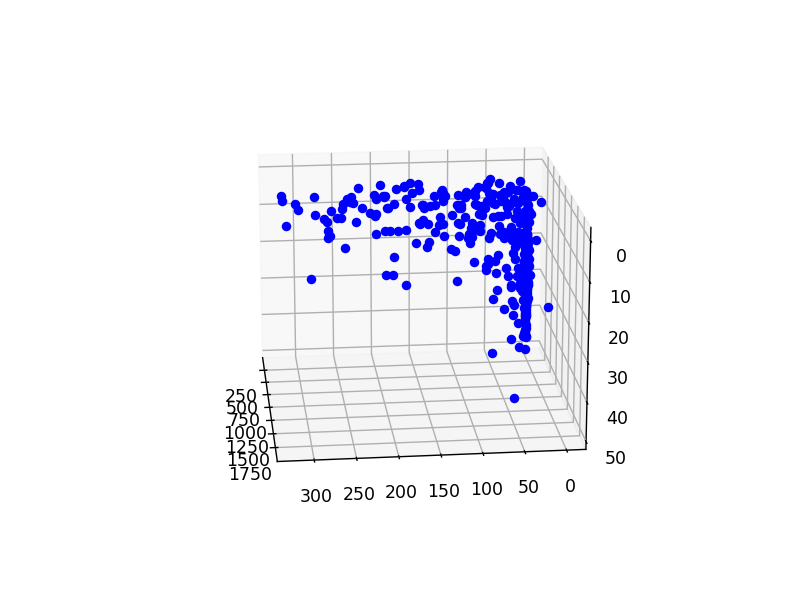

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
for i in range(df.shape[0]):
    x = df.iloc[i,5]
    y = df.iloc[i,7]
    z = df.iloc[i,9]
    ax.scatter(x,y,z, color = 'blue')

In [25]:
!pip install plotly

In [11]:
import plotly.express as px

In [21]:
fig = px.scatter_3d(df_combined, x = 'LDH_last', 
                    y = 'hsCRP_last', z = 'lymphocytes_last', color = 'type')
fig.update_layout(scene = dict(
        xaxis = dict(nticks=10, range=[0,2000],)))
fig.show()